In [29]:
import pandas as pd

### Load Dataset

In [30]:
day_data = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_3/Bike-Sharing-Dataset/day.csv')

### Data Wrangling

In [31]:
df_day = day_data.copy()
df_day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [32]:
## Changing names of columns 

print(df_day.shape)
df_day = df_day.rename(columns={'dteday':'Date','season':'Season' ,'yr':'Year', 'mnth': 'Month', 
            'holiday':'Holiday', 'weekday':'Day_of_the_Week','workingday': 'Working_Day',
            'weathersit':'Weather_Situation','temp':'Temperature',
            'atemp':'Feels_like','hum':'Humidity','windspeed': 'Wind_Speed',
            'casual':'Casual_Users','registered':'Registered_Users','cnt':'Total_Users'})

df_day = df_day.drop(columns=['instant'])


(731, 16)


In [33]:
# Type Conversion of features 

df_day['Date'] = pd.to_datetime(df_day['Date'])

In [34]:
df_day = df_day.set_index('Date')
df_day.head(3)

,Season,Year,Month,Holiday,Day_of_the_Week,Working_Day,Weather_Situation,Temperature,Feels_like,Humidity,Wind_Speed,Casual_Users,Registered_Users,Total_Users
Date,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [35]:
df_day.isna().sum()

Season               0
Year                 0
Month                0
Holiday              0
Day_of_the_Week      0
Working_Day          0
Weather_Situation    0
Temperature          0
Feels_like           0
Humidity             0
Wind_Speed           0
Casual_Users         0
Registered_Users     0
Total_Users          0
dtype: int64

In [36]:
df_day = df_day.drop_duplicates()

In [37]:
df_day.dtypes

Season                 int64
Year                   int64
Month                  int64
Holiday                int64
Day_of_the_Week        int64
Working_Day            int64
Weather_Situation      int64
Temperature          float64
Feels_like           float64
Humidity             float64
Wind_Speed           float64
Casual_Users           int64
Registered_Users       int64
Total_Users            int64
dtype: object

In [38]:
# Encoding values of categorical variables for EDA

In [39]:
# To check encoding of Holiday feature 
# df_day.loc['2011-07-01':'2011-07-10']

df_day.loc[df_day['Holiday'] == 0, 'Holiday'] = 'No'
df_day.loc[df_day['Holiday'] == 1, 'Holiday'] = 'Yes'

In [40]:
seasons = ['Winter','Spring','Summer','Fall']

for idx in range(len(seasons)):
    
    df_day.loc[df_day['Season'] == idx + 1, 'Season'] = seasons[idx] 

In [41]:
months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']

for idx in range(len(months)):
    
    df_day.loc[df_day['Month'] == idx + 1, 'Month'] = months[idx]  

In [42]:
df_day.loc[df_day['Year'] == 0, 'Year'] = 2011
df_day.loc[df_day['Year'] == 1, 'Year'] = 2012

In [43]:
df_day["is_weekend"] = df_day.Day_of_the_Week.isin([0, 6])
df_day['is_weekend'] = ['Yes' if val == True else 'No' for val in df_day['is_weekend']]

In [44]:
days_of_the_week = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

for idx in range(len(days_of_the_week)):
    df_day.loc[df_day['Day_of_the_Week'] == idx, 'Day_of_the_Week'] = days_of_the_week[idx]

In [45]:
df_day.head(3)

,Season,Year,Month,Holiday,Day_of_the_Week,Working_Day,Weather_Situation,Temperature,Feels_like,Humidity,Wind_Speed,Casual_Users,Registered_Users,Total_Users,is_weekend
Date,,,,,,,,,,,,,,,
2011-01-01,Winter,2011,Jan,No,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Yes
2011-01-02,Winter,2011,Jan,No,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Yes
2011-01-03,Winter,2011,Jan,No,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,No


In [46]:
df_day.loc[df_day['Working_Day'] == 0, 'Working_Day'] = 'No'
df_day.loc[df_day['Working_Day'] == 1, 'Working_Day'] = 'Yes'

In [47]:
weather_sit = ['partly cloudy','cloudy','light precipitation', 'heavy precipitation']

for idx in range(len(weather_sit)):
    df_day.loc[df_day['Weather_Situation'] == idx + 1, 'Weather_Situation'] = weather_sit[idx]

In [48]:
df_day['Temperature (°C)'] = (df_day.Temperature * 47) - 8
df_day['Feels_like (°C)'] = (df_day.Temperature * 50) - 16
df_day['Humidity (%)'] = df_day.Humidity * 100
df_day['Wind_Speed (km/hr)'] = df_day.Wind_Speed * 67

In [49]:
df_day.head(3)

,Season,Year,Month,Holiday,Day_of_the_Week,Working_Day,Weather_Situation,Temperature,Feels_like,Humidity,Wind_Speed,Casual_Users,Registered_Users,Total_Users,is_weekend,Temperature (°C),Feels_like (°C),Humidity (%),Wind_Speed (km/hr)
Date,,,,,,,,,,,,,,,,,,,
2011-01-01,Winter,2011,Jan,No,Sat,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Yes,8.175849,1.20835,80.5833,10.749882
2011-01-02,Winter,2011,Jan,No,Sun,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Yes,9.083466,2.17390,69.6087,16.652113
2011-01-03,Winter,2011,Jan,No,Mon,Yes,partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,No,1.229108,-6.18180,43.7273,16.636703


### EDA

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df_day.columns

Index(['Season', 'Year', 'Month', 'Holiday', 'Day_of_the_Week', 'Working_Day',
       'Weather_Situation', 'Temperature', 'Feels_like', 'Humidity',
       'Wind_Speed', 'Casual_Users', 'Registered_Users', 'Total_Users',
       'is_weekend', 'Temperature (°C)', 'Feels_like (°C)', 'Humidity (%)',
       'Wind_Speed (km/hr)'],
      dtype='object')

In [52]:
df_day['Weather_Situation'].unique()

array(['cloudy', 'partly cloudy', 'light precipitation'], dtype=object)

#### Visualizing columns of interest from the entire time series

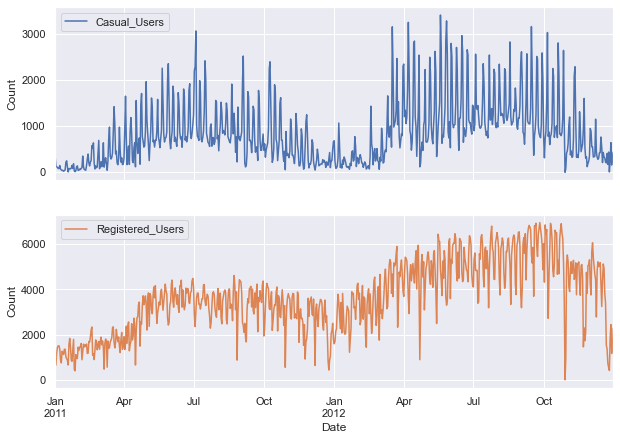

In [53]:
sns.set(rc = {'figure.figsize':(10,7)})

#cols_plot = ['Temperature (°C)', 'Feels_like (°C)','Humidity (%)', 'Wind_Speed (km/hr)']
cols_plot = ['Casual_Users', 'Registered_Users']
axes = df_day[cols_plot].plot(linewidth=1.5, subplots=True)
#axes = df_day[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Count')

#### Visualising the same columns of a specific time span

In [70]:
import matplotlib.dates as mdates

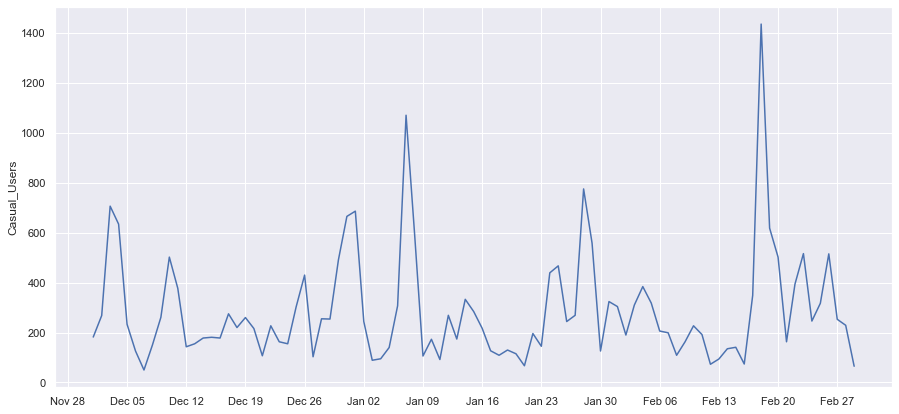

In [75]:
fig, ax = plt.subplots()
cols_plot = ['Casual_Users']
for col in cols_plot:
    ax.plot(df_day.loc['2011-12':'2012-02',  col], linewidth=1.5)
    ax.set_ylabel(col)
    # Set x-axis major ticks to weekly interval, on Mondays
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    # Format x-tick labels as 3-letter month name and day number
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


#### Seasonality Check

In [ ]:
df_day.head(3)

In [ ]:
# To set a business objective of increasing casual user count

fig, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
for name, ax in zip(['Casual_Users', 'Registered_Users'], axes):
    sns.boxplot(data=df_day, x='Year', y=name, ax=ax) #x='Month', 'Day_of_the_Week'
    ax.set_ylabel(name)
    ax.set_title(name)
    ax.set_xlabel('')
    

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
for name, ax in zip(['Casual_Users', 'Registered_Users'], axes):
    sns.boxplot(data=df_day, x='Month', y=name, ax=ax) #x='Month', 'Day_of_the_Week'
    ax.set_ylabel(name)
    ax.set_title(name)
    ax.set_xlabel('')

In [ ]:
### Reiterating objective to increase casual user count, especially during the weekdays

fig, axes = plt.subplots(2, 1, figsize=(10,7), sharex=True)
for name, ax in zip(['Casual_Users', 'Registered_Users'], axes):
    sns.boxplot(data=df_day, x='Day_of_the_Week', y=name, ax=ax) #x='Month', 'Day_of_the_Week'
    ax.set_ylabel(name)
    ax.set_title(name)
    ax.set_xlabel('Day of the Week')


#### Resampling 

In [58]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Casual_Users', 'Registered_Users']
# Resample to weekly frequency, aggregating with mean
df_day_mean = df_day[data_columns].resample('W').mean()

In [ ]:
print(df_day.shape[0])
print(df_day_mean.shape[0])

#### Rolling Mean

In [94]:
# Compute the centered rolling mean
data_columns = ['Casual_Users', 'Registered_Users', 'Total_Users', 'Weather_Situation']
df_day_7d = df_day[data_columns].rolling(28, center=True).mean()
df_day_7d.head(10)

,Casual_Users,Registered_Users,Total_Users
Date,,,
2011-01-01,NaN,NaN,NaN
2011-01-02,NaN,NaN,NaN
2011-01-03,NaN,NaN,NaN
2011-01-04,NaN,NaN,NaN
2011-01-05,NaN,NaN,NaN
2011-01-06,NaN,NaN,NaN
2011-01-07,NaN,NaN,NaN
2011-01-08,NaN,NaN,NaN
2011-01-09,NaN,NaN,NaN


In [103]:
df_day.dtypes

Season                 object
Year                    int64
Month                  object
Holiday                object
Day_of_the_Week        object
Working_Day            object
Weather_Situation      object
Temperature           float64
Feels_like            float64
Humidity              float64
Wind_Speed            float64
Casual_Users            int64
Registered_Users        int64
Total_Users             int64
is_weekend             object
Temperature (°C)      float64
Feels_like (°C)       float64
Humidity (%)          float64
Wind_Speed (km/hr)    float64
dtype: object

In [102]:
df_day_7d.dtypes

Casual_Users        float64
Registered_Users    float64
Total_Users         float64
dtype: object

In [101]:
sns.pointplot(data=df_day_7d, x=df_day_7d.index,y='Total_Users',hue='Weather_Situation')

ValueError: Could not interpret input 'Weather_Situation'

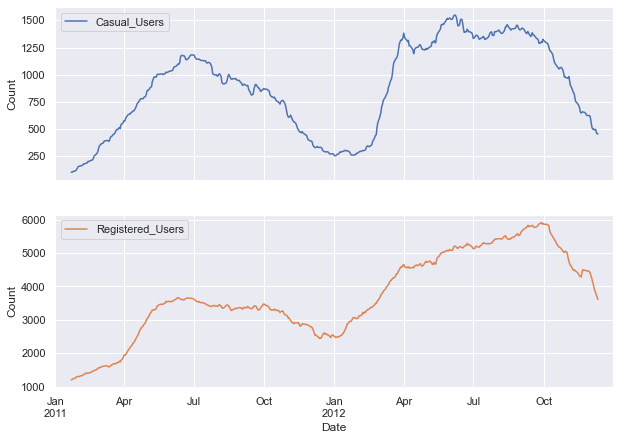

In [79]:
sns.set(rc = {'figure.figsize':(10,7)})

#cols_plot = ['Temperature (°C)', 'Feels_like (°C)','Humidity (%)', 'Wind_Speed (km/hr)']
cols_plot = ['Casual_Users', 'Registered_Users']
axes = df_day_7d[cols_plot].plot(linewidth=1.5, subplots=True)
#axes = df_day[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Count')

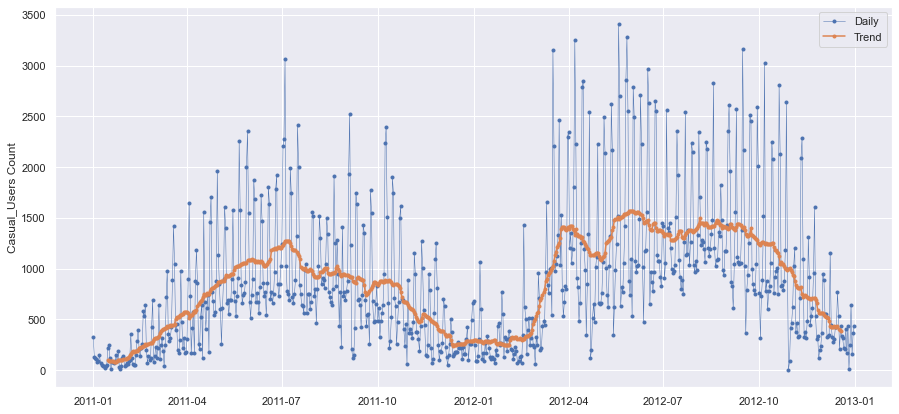

In [84]:
sns.set(rc = {'figure.figsize':(15,7)})

# Start and end of the date range to extract
start, end = '2011-01', '2012-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(df_day.loc[start:end, 'Casual_Users'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

# ax.plot(df_day_mean.loc[start:end, 'Registered_Users'],
# marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(df_day_7d.loc[start:end, 'Casual_Users'],
marker='.', linestyle='-', label='Trend')

ax.set_ylabel('Casual_Users Count')
ax.legend()

In [67]:
df_day_365d = df_day[data_columns].rolling(window=365, center=True, min_periods=360).mean()

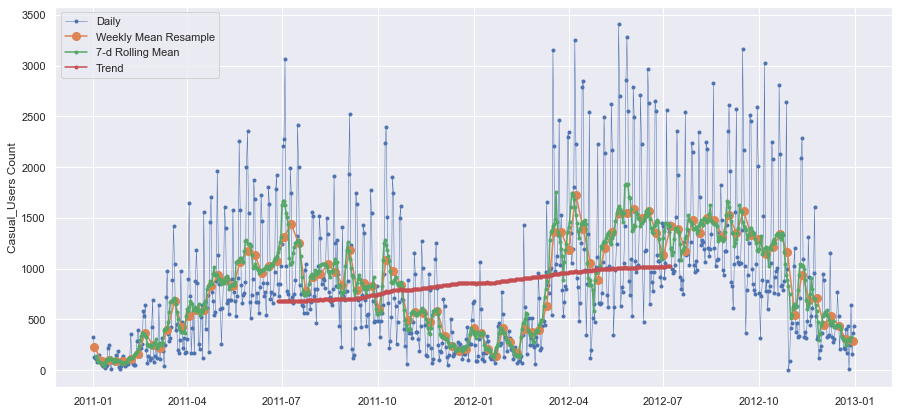

In [68]:
sns.set(rc = {'figure.figsize':(15,7)})

# Start and end of the date range to extract
start, end = '2011-01', '2012-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(df_day.loc[start:end, 'Casual_Users'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(df_day_mean.loc[start:end, 'Casual_Users'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(df_day_7d.loc[start:end, 'Casual_Users'],
marker='.', linestyle='-', label='7-d Rolling Mean')

ax.plot(df_day_365d.loc[start:end, 'Casual_Users'],
marker='.', linestyle='-', label='Trend')

ax.set_ylabel('Casual_Users Count')
ax.legend()

In [ ]:
print(df_day.shape[0])
print(df_day_mean.shape[0])

<AxesSubplot:xlabel='is_weekend', ylabel='Casual_Users'>

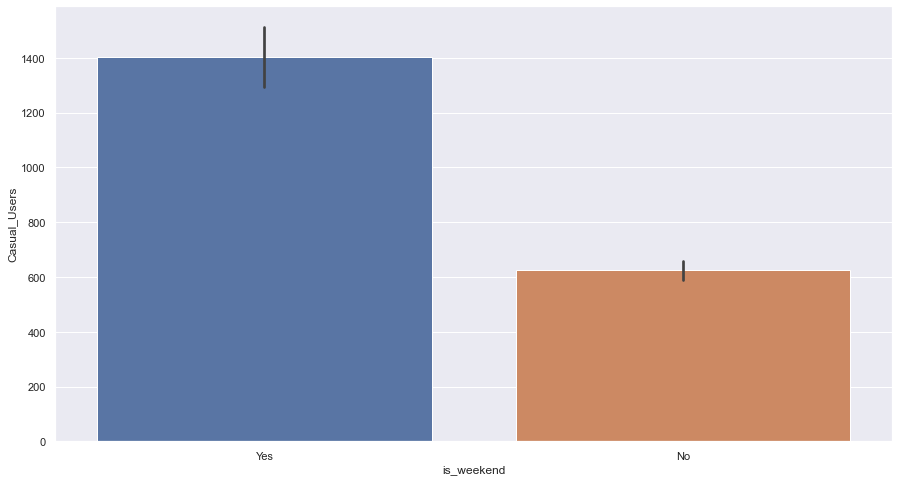

In [91]:
sns.barplot(x=df_day['is_weekend'], y=df_day['Casual_Users'])

In [ ]:
df_season = df_day.loc[df_day['Season'] == 'Winter']

In [87]:
df_day_7d.head(3)

,Casual_Users,Registered_Users
Date,,
2011-01-01,NaN,NaN
2011-01-02,NaN,NaN
2011-01-03,NaN,NaN


In [88]:
# Compute the centered rolling mean
data_columns = ['Casual_Users', 'Registered_Users','Feels_like (°C)']
df_day_7d = df_day[data_columns].rolling(28, center=True).mean()
df_day_7d.head(10)

,Casual_Users,Registered_Users,Feels_like (°C)
Date,,,
2011-01-01,NaN,NaN,NaN
2011-01-02,NaN,NaN,NaN
2011-01-03,NaN,NaN,NaN
2011-01-04,NaN,NaN,NaN
2011-01-05,NaN,NaN,NaN
2011-01-06,NaN,NaN,NaN
2011-01-07,NaN,NaN,NaN
2011-01-08,NaN,NaN,NaN
2011-01-09,NaN,NaN,NaN


<AxesSubplot:xlabel='Feels_like (°C)', ylabel='Registered_Users'>

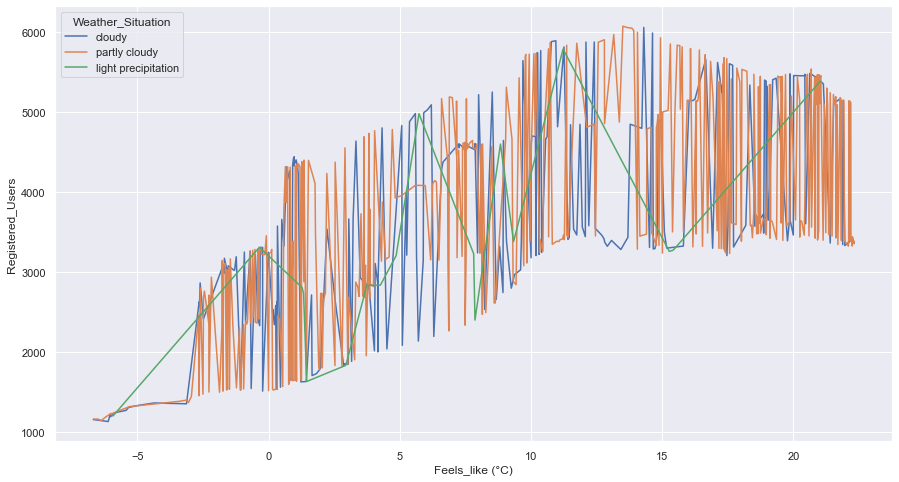

In [90]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=df_day_7d['Feels_like (°C)'], y=df_day_7d['Registered_Users'], hue = df_day['Weather_Situation'])

#plt.title('2011 March')
